# [CNN - Exercise](https://fhict.instructure.com/courses/13057)

#### Relevant Modules

### Description
?



### Deliverable
Convert your Jupyter notebook to html and deliver the .html file. 

#################################################################

# Code



### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

import numpy as np
import seaborn as sns

import os

######################

print(tf.__version__)
print(keras.__version__)
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

2.11.0
2.11.0
3.7.0
1.5.3
1.24.2
0.12.2


### GPU

> docker run -it -p 8888:8888 --gpus all tensorflow/tensorflow:latest-gpu-jupyter

Add `--rm` after "-it" delete container after use

[Jupyter notebook](http://127.0.0.1:8888/?token=ff8fb0c4e52f38517f21a83ba7860fa3f21246ea1f526497)

[Only working guide on youtube, other ones are for tf 2.10 and dont work](https://www.youtube.com/watch?v=YozfiLI1ogY)

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(f"Is built with CUDA {tf.test.is_built_with_cuda()}")

Num GPUs Available:  0
Is built with CUDA False


## Data

Dataset is to large to include in git, see: [Bird Dataset](https://www.kaggle.com/datasets/gpiosenka/100-bird-species) or `https://www.kaggle.com/datasets/gpiosenka/100-bird-species` for source of dataset. 

(Place unzipped into "../Dataset/BirdSet/" for usage)

In [3]:
df = pd.read_csv('../Dataset/BirdSet/birds.csv', sep=',')

df.head()

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train,Malacocincla abbotti


In [4]:
birds_in_train = len(os.listdir("../Dataset/BirdSet/train"))
birds_in_test = len(os.listdir("../Dataset/BirdSet/test"))
birds_in_csv = len(df.labels.unique())

print(f"There are {birds_in_train} bird species in train, {birds_in_csv} in csv, and {birds_in_test} bird species in test")

There are 500 bird species in train, 500 in csv, and 500 bird species in test


(224, 224, 3)

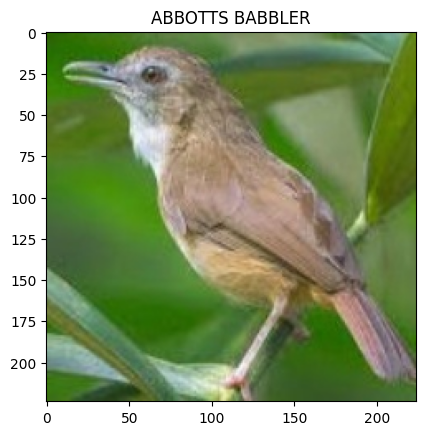

In [5]:
def view_bird_species(species_to_view = 'ABBOTTS BABBLER'):
    path = "../Dataset/BirdSet/train/" + species_to_view + "/"

    image = mpimg.imread(path + os.listdir(path)[-1])    
    
    plt.imshow(image)
    plt.title(species_to_view)

    return image.shape

view_bird_species()  # Without assigning it prints pixel arr

In [6]:
dir_train = "../Dataset/BirdSet/train/"
dir_test = "../Dataset/BirdSet/test/"
dir_vali = "../Dataset/BirdSet/valid/"

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
data_train = train_datagen.flow_from_directory(directory = dir_train,
                                               batch_size= 32,
                                               target_size= (500,500),
                                               class_mode = "categorical")

data_test = test_datagen.flow_from_directory(directory = dir_test,
                                               batch_size = 32,
                                               target_size = (500,500),
                                               class_mode = "categorical")

data_vali = valid_datagen.flow_from_directory(directory = dir_vali,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 80085 images belonging to 500 classes.
Found 2500 images belonging to 500 classes.
Found 2500 images belonging to 500 classes.


## Model

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(500, (3,3), activation='relu', input_shape=(500,500,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten()) #Flattens last layer into one ==> 4*4*64=1024
model.add(tf.keras.layers.Dense(64, activation='relu')) #dense layer of flattened layer
model.add(tf.keras.layers.Dense(500)) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 500)     14000     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 500)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      288064    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
 flatten (Flatten)           (None, 937024)            0

In [9]:
model.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

In [10]:
history = model.fit(data_train, epochs=3, validation_data=data_vali)

Epoch 1/3


: 

: 

## Evaluation

# Appendix



## Issues


- ...........


## Sources



[Title of example](https://www.google.com)



[TensorFlow documentation, MNIST classification](https://www.tensorflow.org/tutorials/keras/classification)














##### Example, ToDo Delete

[Tensorflow docs; loading Fasion_MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)

[Udemy, Intro to Machine Learning, Decision Trees](https://learn.udacity.com/courses/ud120/lessons/45da7686-9785-44db-9cbc-55a0286292a3/concepts/337a88e5-b117-494f-ac66-574cdf39a35b)

[SciKit Decision Tree blogpost](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d)

[scikit learn; RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

[scikit learn; ensemble](https://scikit-learn.org/stable/modules/ensemble.html#forest)

[scikit learn; PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

[scikit learn; logistic regression (with softmax)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Canvas, Decision Trees](https://fhict.instructure.com/courses/13057/pages/decision-trees)

[ADS-A ML w5 Decision Trees](../Files/ADS-A%20ML%20w5%20Decision%20Trees.pdf)

[Numpy reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

